In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from hepattn.experiments.clic.performance.performance import Performance, PerformanceConfig
from hepattn.experiments.clic.performance.plot_helper import PlotHelper

In [3]:
config_dict = {
    "truth_path": "/storage/agrp/dmitrykl/hgpf/hepformer/data/nilo/test_clic_common_raw.root",
    "networks": [
        {
            "name": "mpflow",
            "path": "/storage/agrp/dmitrykl/hgpf/hepattn/src/hepattn/experiments/clic/logs/CLIC_Pflow_FullDiceFocFix_20250613-T142512/ckpts/epoch=159-val_loss=3.51694__test__common.root",
            "network_type": "mpflow_proxy",
            "ind_threshold": 0.65,
        },
        {
            "name": "hgpflow",
            "path": "/storage/agrp/nilotpal/HGPFlow_v2/experiments/hgpflow_v2/clicxminixbig1x2xs2xxxds7kirm1yo/inference/ee_qq_new/pred_test_p8_ee_qq_ecm380_20k_seg_bw0.3_nocut_merged.root",
            "network_type": "hgpflow_proxy",
            "ind_threshold": 0.65,
        },
        {
            "name": "mlpf",
            "path": "/srv01/agrp/dmitrykl/projects/mlpf/particleflow/experiments/pyg-clic-my_20250726_155449_087474/test/preds_common_checkpoint-21-2.657597/batch_size",
            "network_type": "mlpf",
        },
    ],
}

In [4]:
config = PerformanceConfig.from_dict(config_dict)

In [5]:
perf_obj = Performance(config)

E, pT will be scaled by 1


Reading truth tree...: 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]


Number of events with at least one track or topocluster: 19998 out of 20000
[[ 1399]
 [11288]]
Number of events after filtering: 19998


Computing MLPF mass...: 100%|██████████| 19993/19993 [00:00<00:00, 130751.14it/s]


In [6]:
perf_obj.reorder_and_find_intersection()

common event count: 19717


Filtering and reordering pandora...: 100%|██████████| 7/7 [00:00<00:00, 1274.98it/s]


In [7]:
perf_obj.compute_jets(n_procs=20)

Jet clustering algorithm:  genkt
Jet clustering radius:  0.7
truth


Computing jets...:   0%|          | 0/20 [00:00<?, ?Chunk/s]

                  

Computing jets...:   5%|▌         | 1/20 [00:03<00:58,  3.10s/Chunk]

  

Computing jets...: 100%|██████████| 20/20 [00:06<00:00,  3.24Chunk/s]


Computing jets for mpflow...


Computing jets...: 100%|██████████| 20/20 [00:06<00:00,  3.15Chunk/s]


Computing jets for hgpflow...


Computing jets...: 100%|██████████| 20/20 [00:06<00:00,  3.25Chunk/s]


Computing jets for mlpf...


Computing jets...: 100%|██████████| 20/20 [00:05<00:00,  3.36Chunk/s]


Computing jets for pandora...


Computing jets...: 100%|██████████| 20/20 [00:05<00:00,  3.41Chunk/s]


In [8]:
perf_obj.hung_match_jets()
perf_obj.compute_event_features()
perf_obj.compute_jet_res_features(dr_cut=0.1, leading_n_jets=2, pt_min=10)

Matching jets...: 100%|██████████| 19717/19717 [00:00<00:00, 29734.82it/s]


In [9]:
from collections import defaultdict


def default_style_dict():
    return {
        "histtype": "step",
        "linewidth": 1,
    }


style_dict = defaultdict(default_style_dict)
style_dict["pandora"] = {
    "color": "gray",
    "alpha": 0.5,
    "histtype": "stepfilled",
}

In [10]:
plot_helper = PlotHelper(perf_obj, style_dict=style_dict)

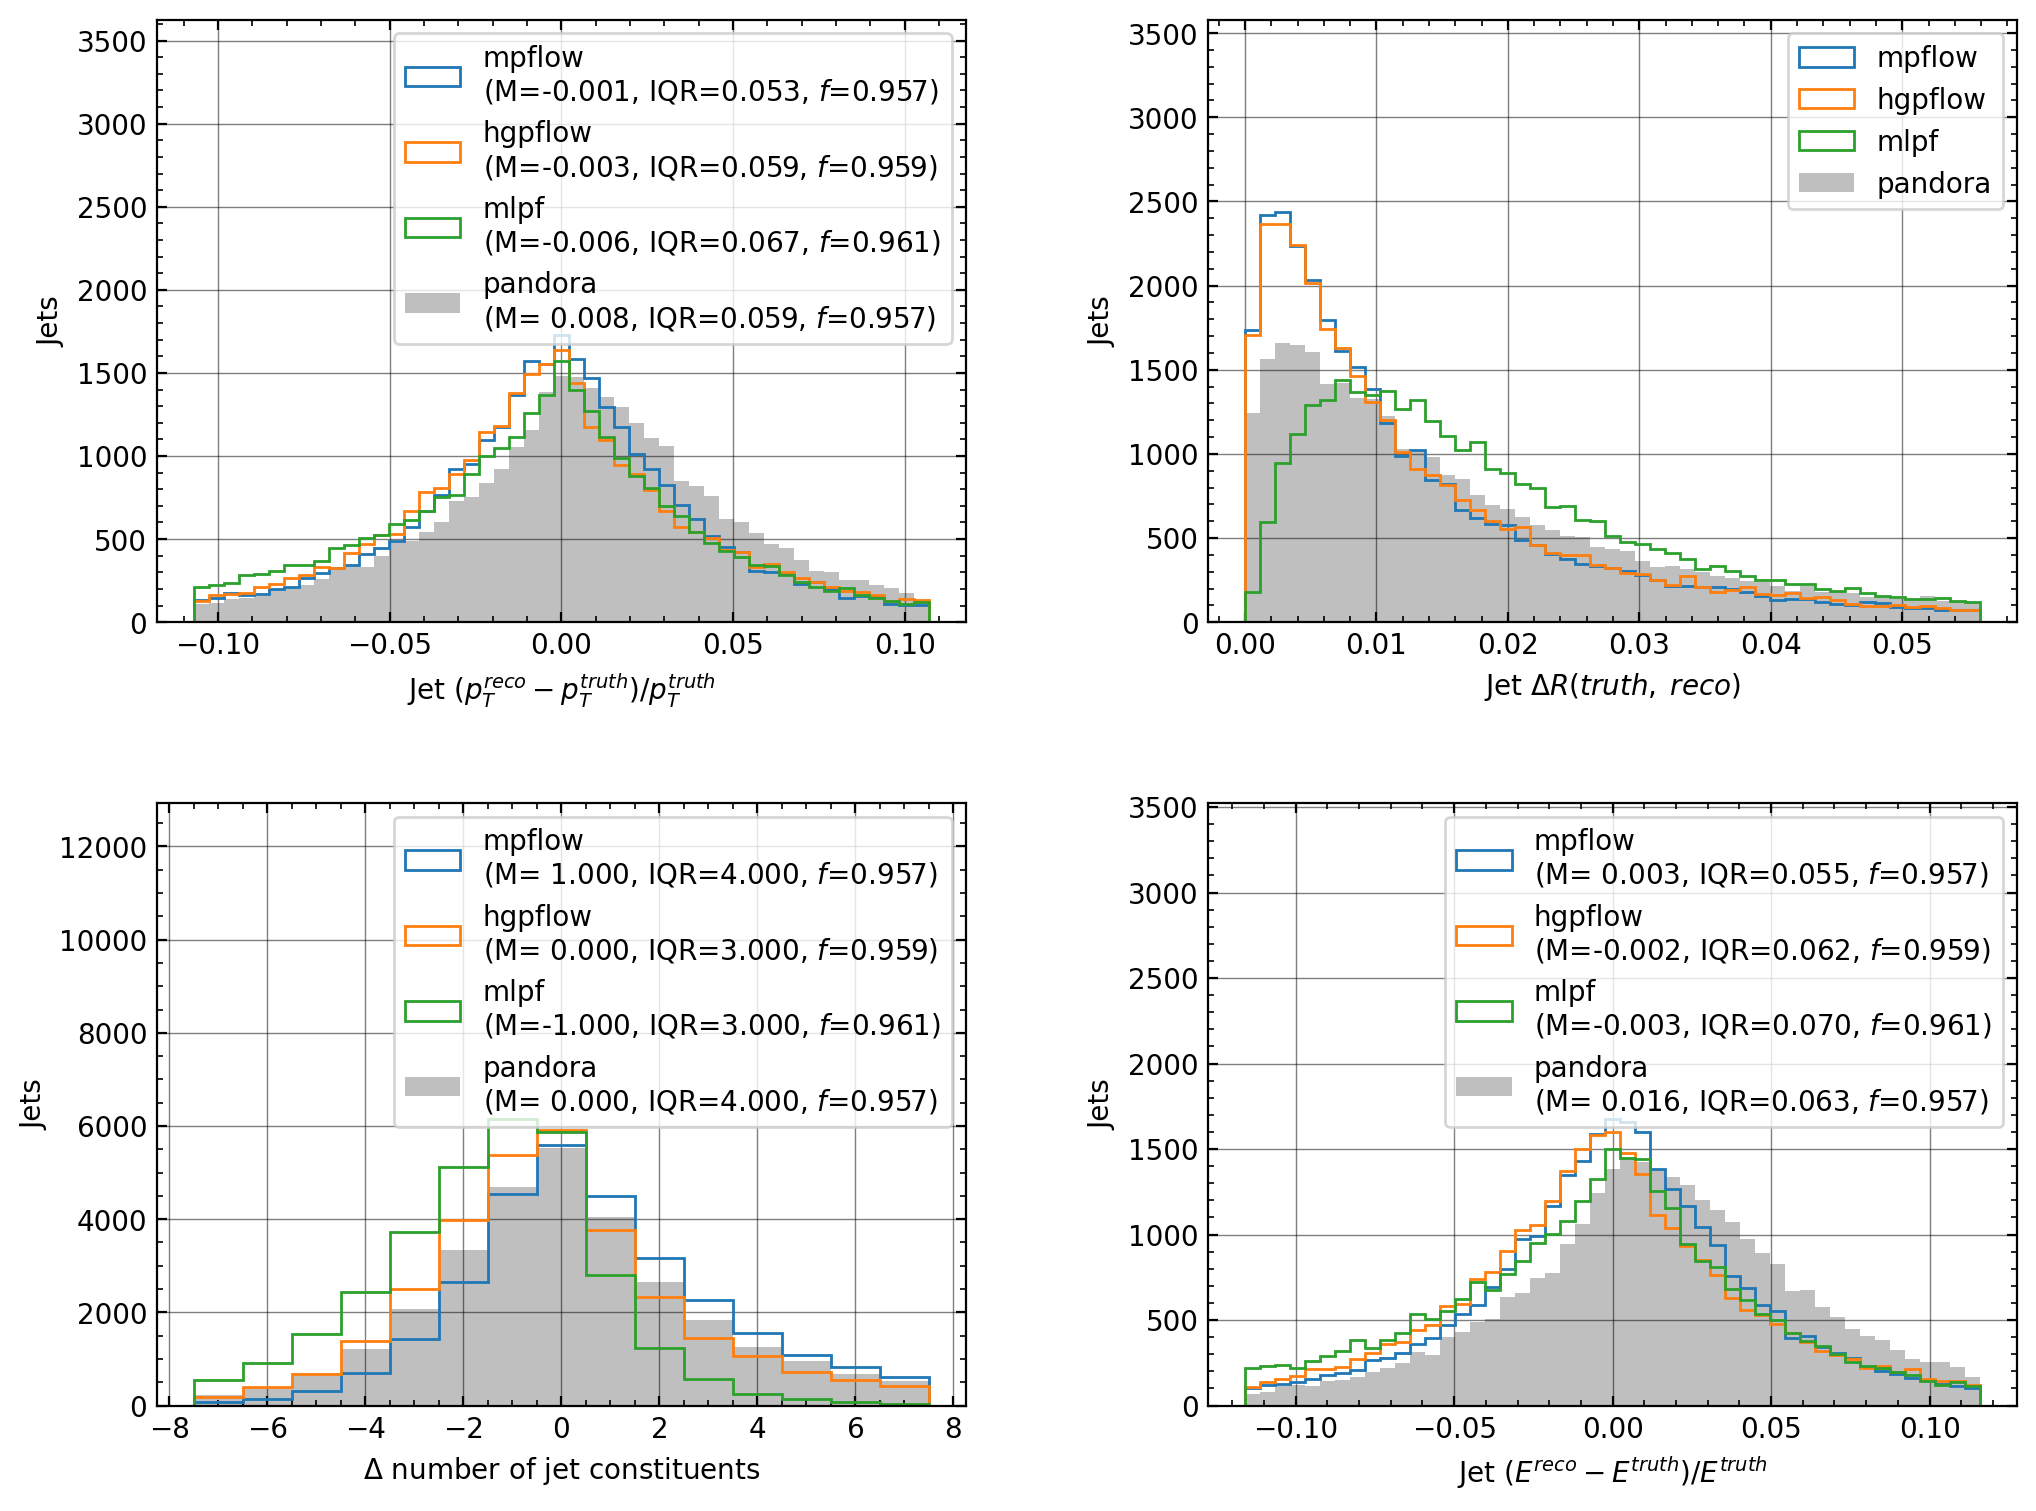

In [11]:
fig = plot_helper.plot_jet_residuals()

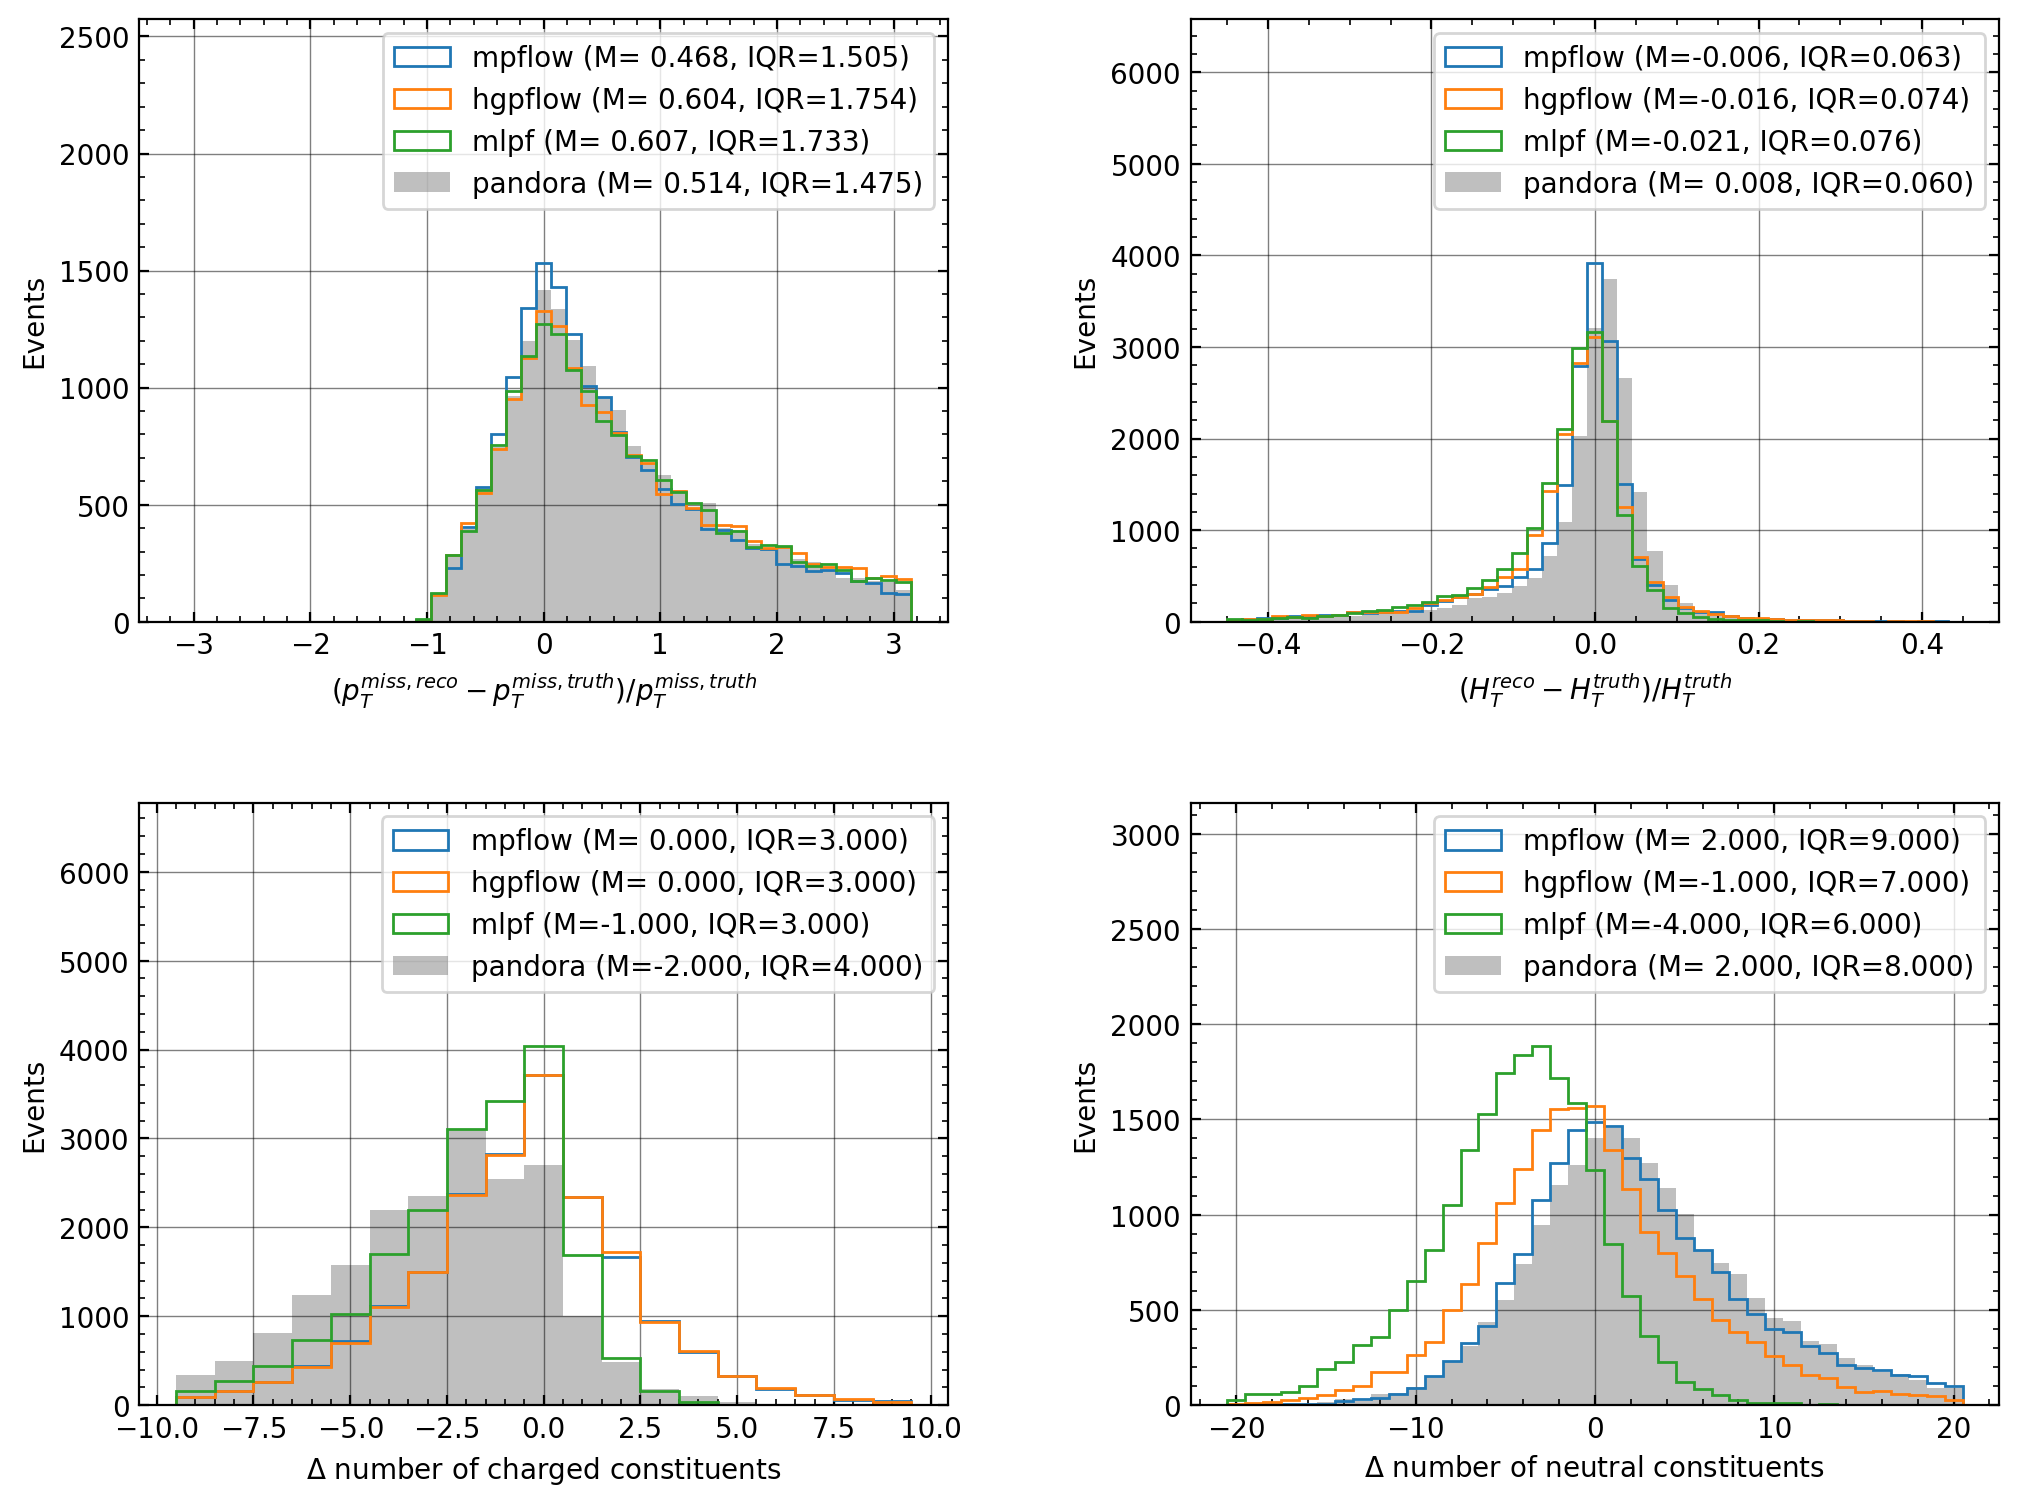

In [12]:
fig = plot_helper.plot_evt_res()

In [13]:
pt_bins = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])

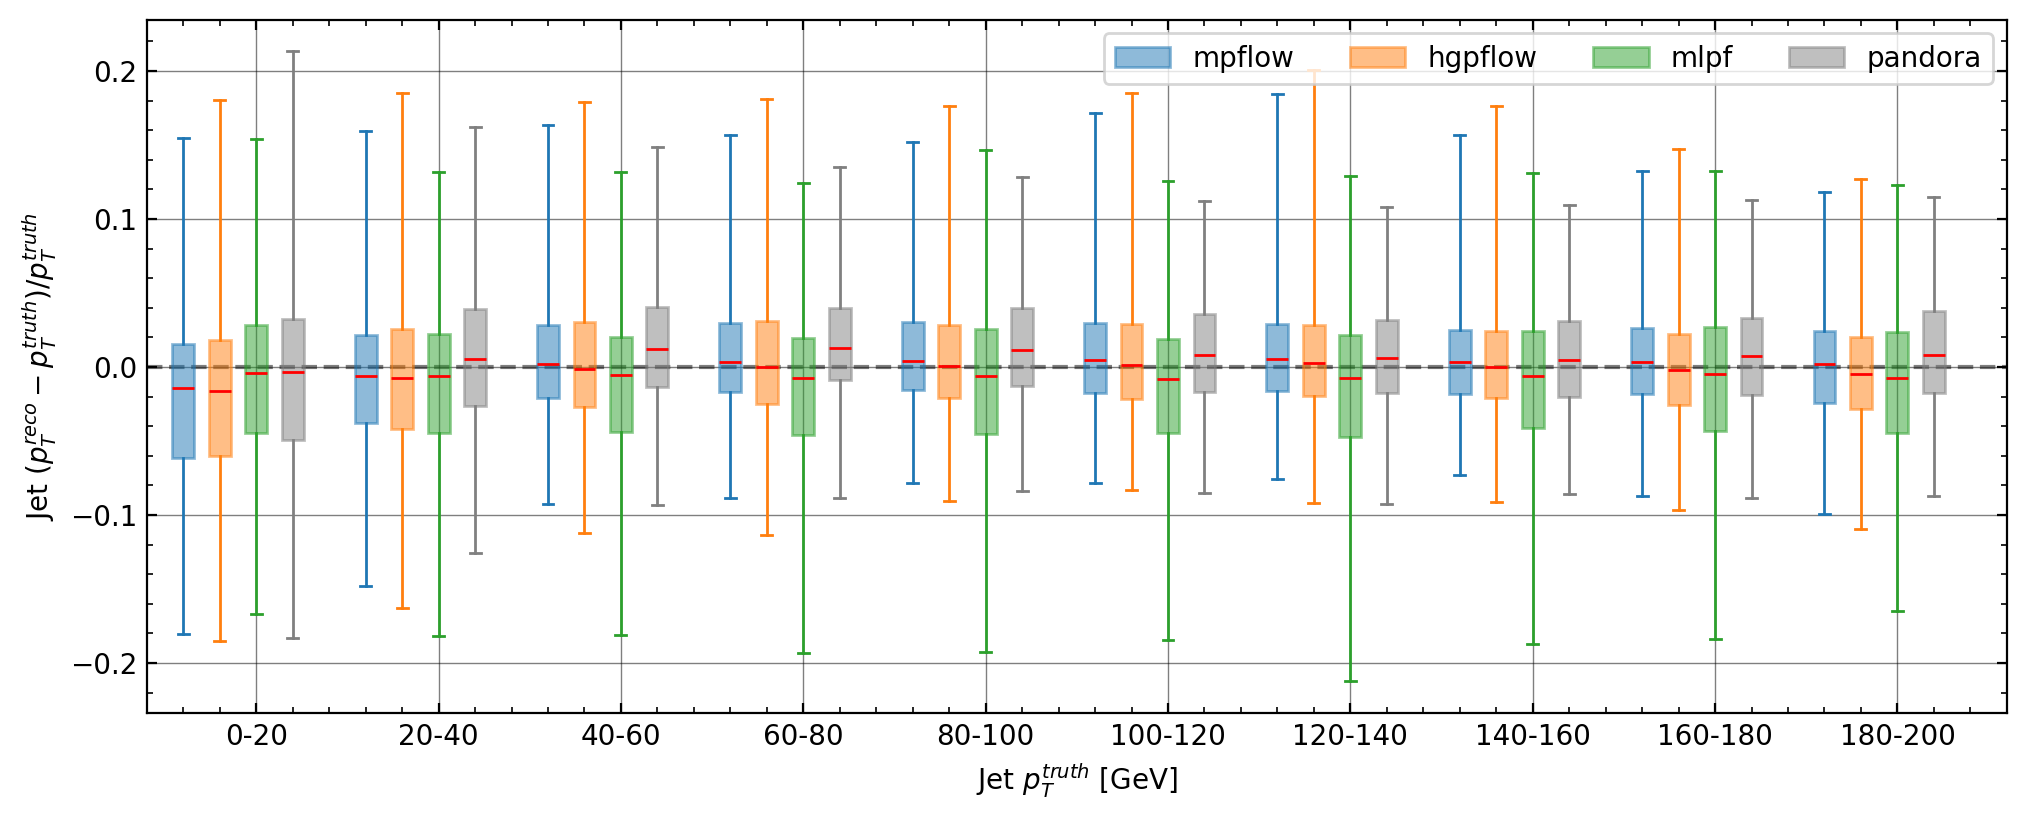

In [14]:
fig = plot_helper.plot_jet_res_boxplot(bins=pt_bins)

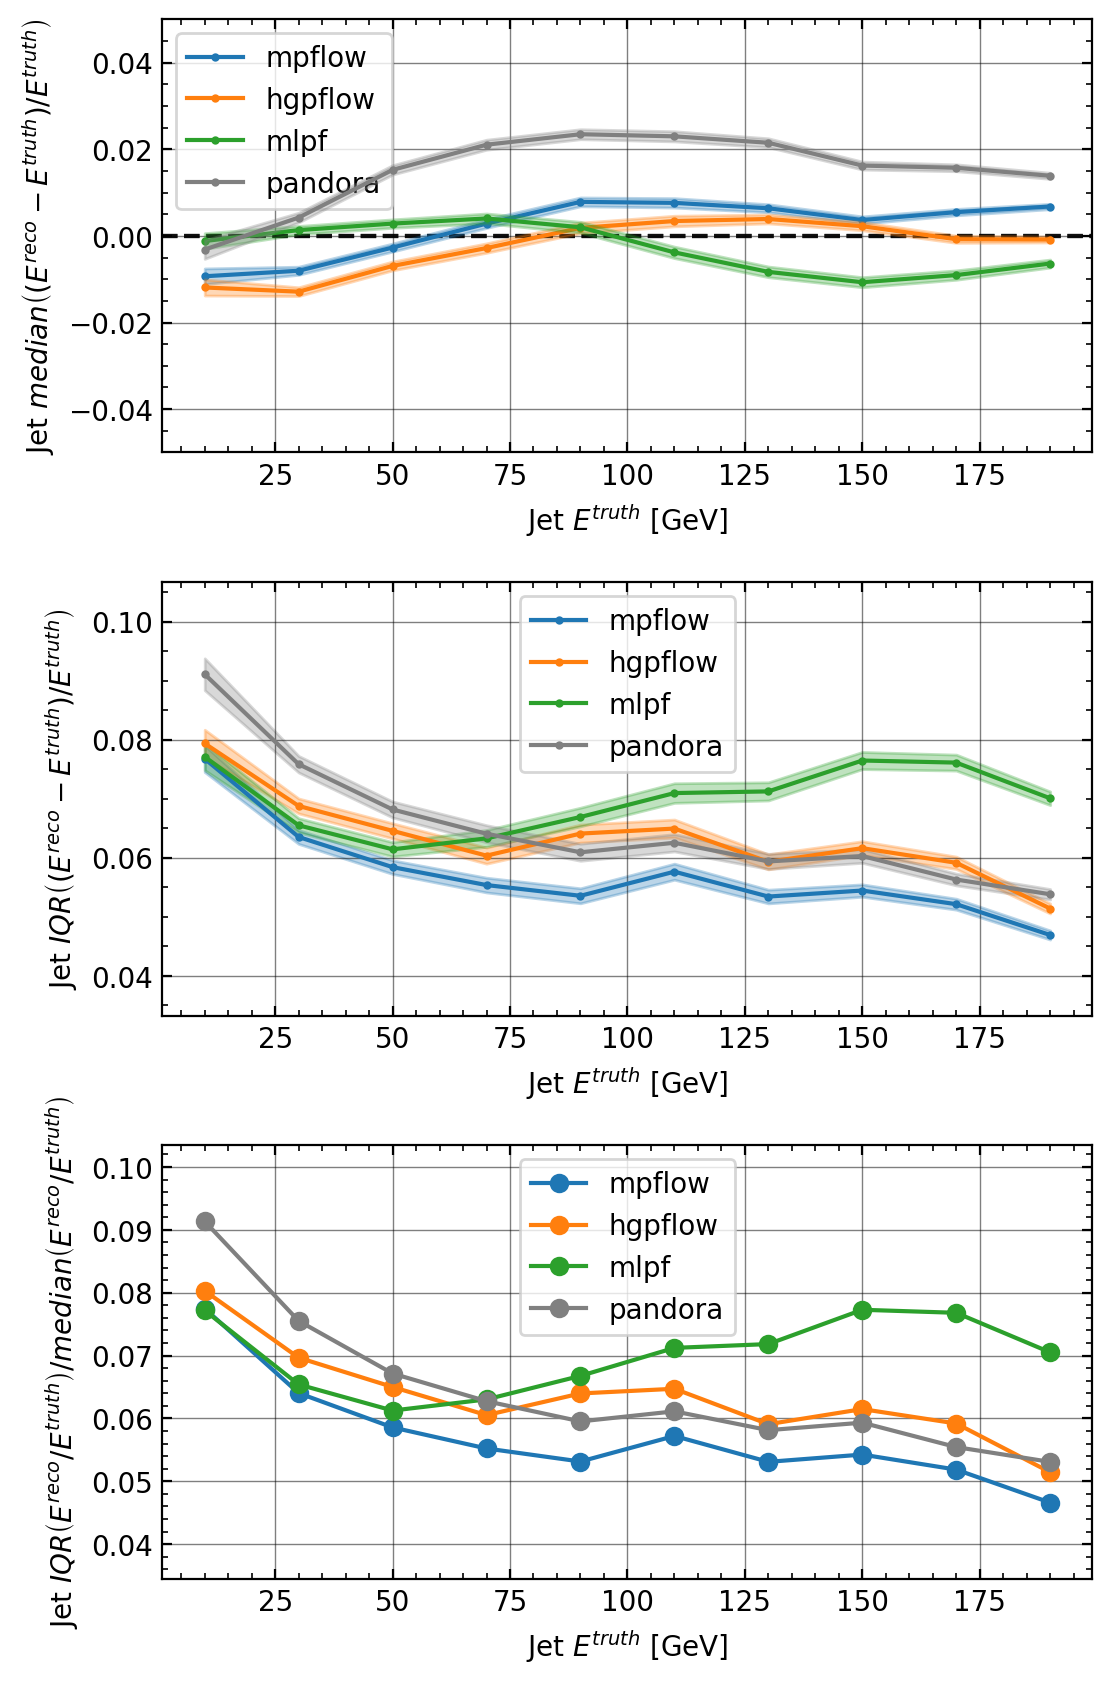

In [15]:
fig = plot_helper.plot_jet_response(pt_bins=pt_bins, use_energy=True)

In [16]:
perf_obj.hung_match_particles(flatten=True, return_unmatched=True)

Matching particles...:   3%|▎         | 502/19717 [00:00<00:03, 5013.00it/s]

Matching particles...: 100%|██████████| 19717/19717 [00:03<00:00, 5291.80it/s]


/storage/agrp/dmitrykl/hgpf/hepattn/src/hepattn/experiments/clic/performance/plot_helper_particle.py:98: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, ax.get_ylim()[1] * (1 + len(residual_dict) * 0.23))


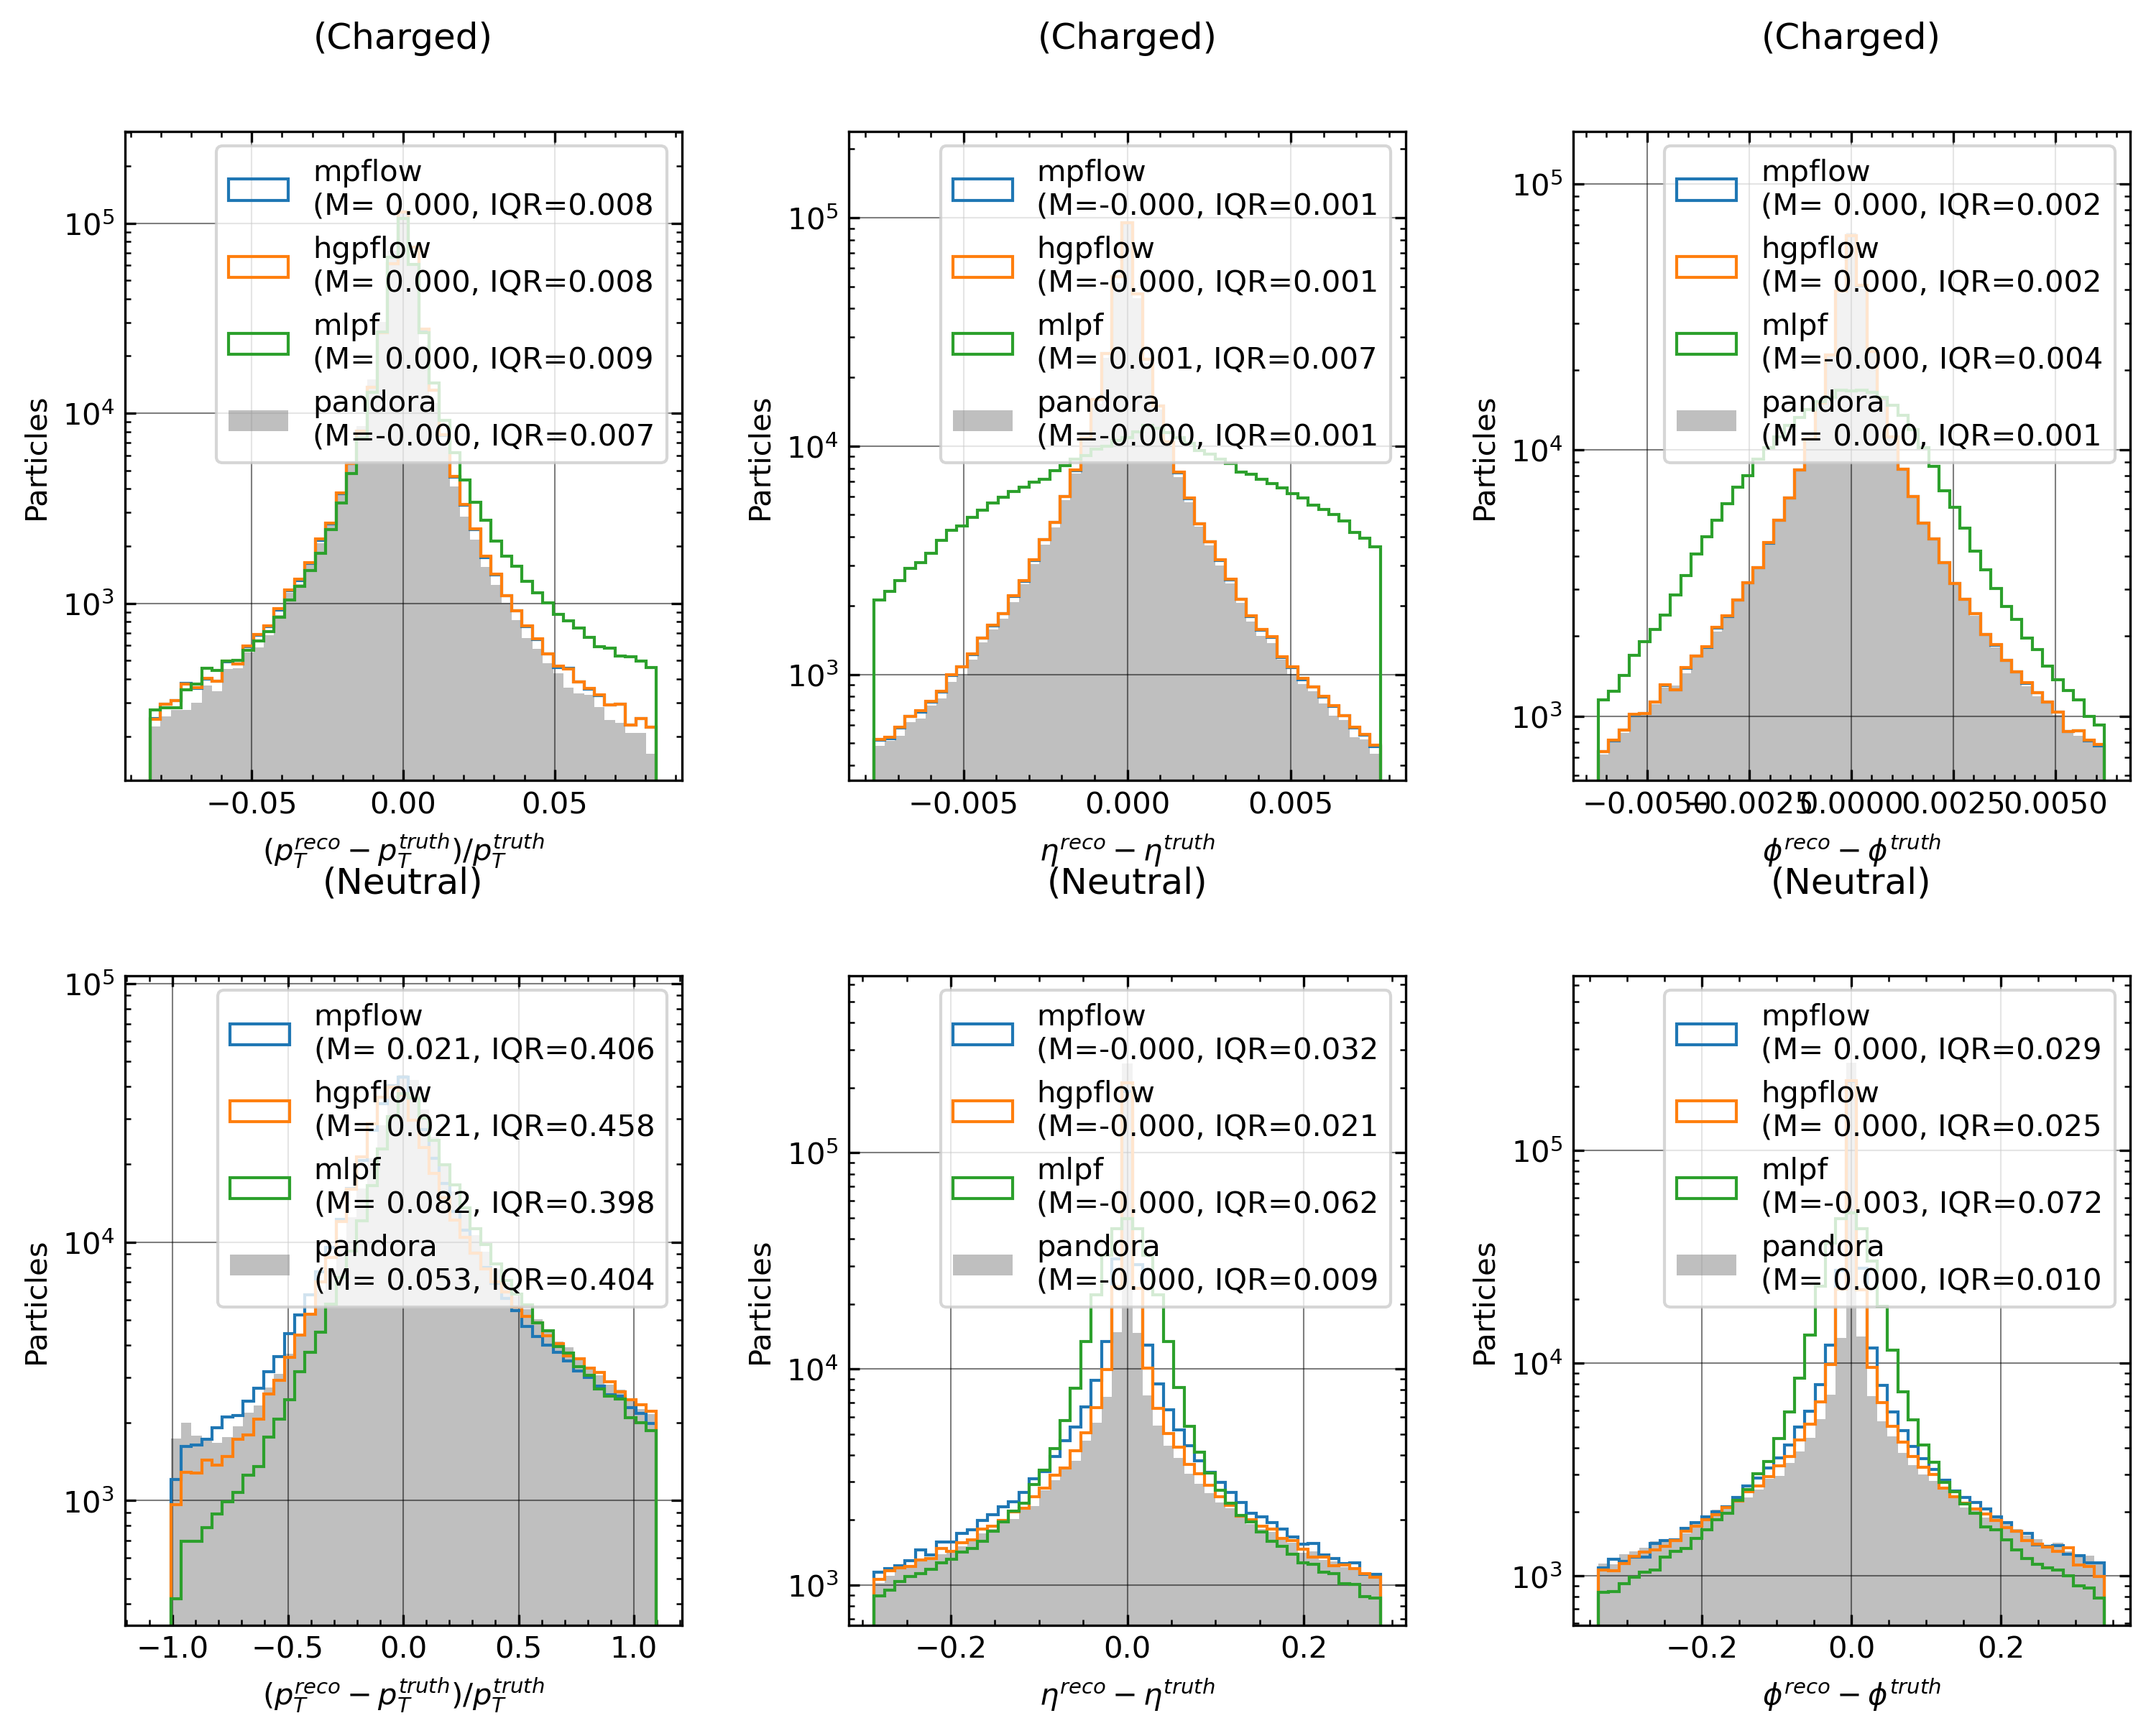

In [17]:
qs = {"Charged": {"pt": 90, "eta": 80, "phi": 80}, "Neutral": {"pt": 90, "eta": 80, "phi": 80}}
fig = plot_helper.plot_residuals(pt_relative=True, log_y=True, qs=qs)

In [18]:
qs = {"Neutral hadron": {"pt": 98, "eta": 75, "phi": 75}, "Photon": {"pt": 99, "eta": 90, "phi": 90}}
fig = plot_helper.plot_residuals_neutrals(pt_relative=True, log_y=True, qs=qs)

/storage/agrp/dmitrykl/hgpf/hepattn/src/hepattn/experiments/clic/performance/plot_helper_particle.py:192: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, ax.get_ylim()[1] * (1 + len(residual_dict) * 0.23))


In [ ]:
eff_fr_colors = {
    "mpflow": {
        "neut had": "mediumseagreen",
        "photon": "tomato",
    },
    "hgpflow": {
        "neut had": "steelblue",
        "photon": "darkorange",
    },
    "pandora": {
        "neut had": "dodgerblue",
        "photon": "goldenrod",
    },
    "mlpf": {
        "neut had": "crimson",
        "photon": "darkviolet",
    },
}

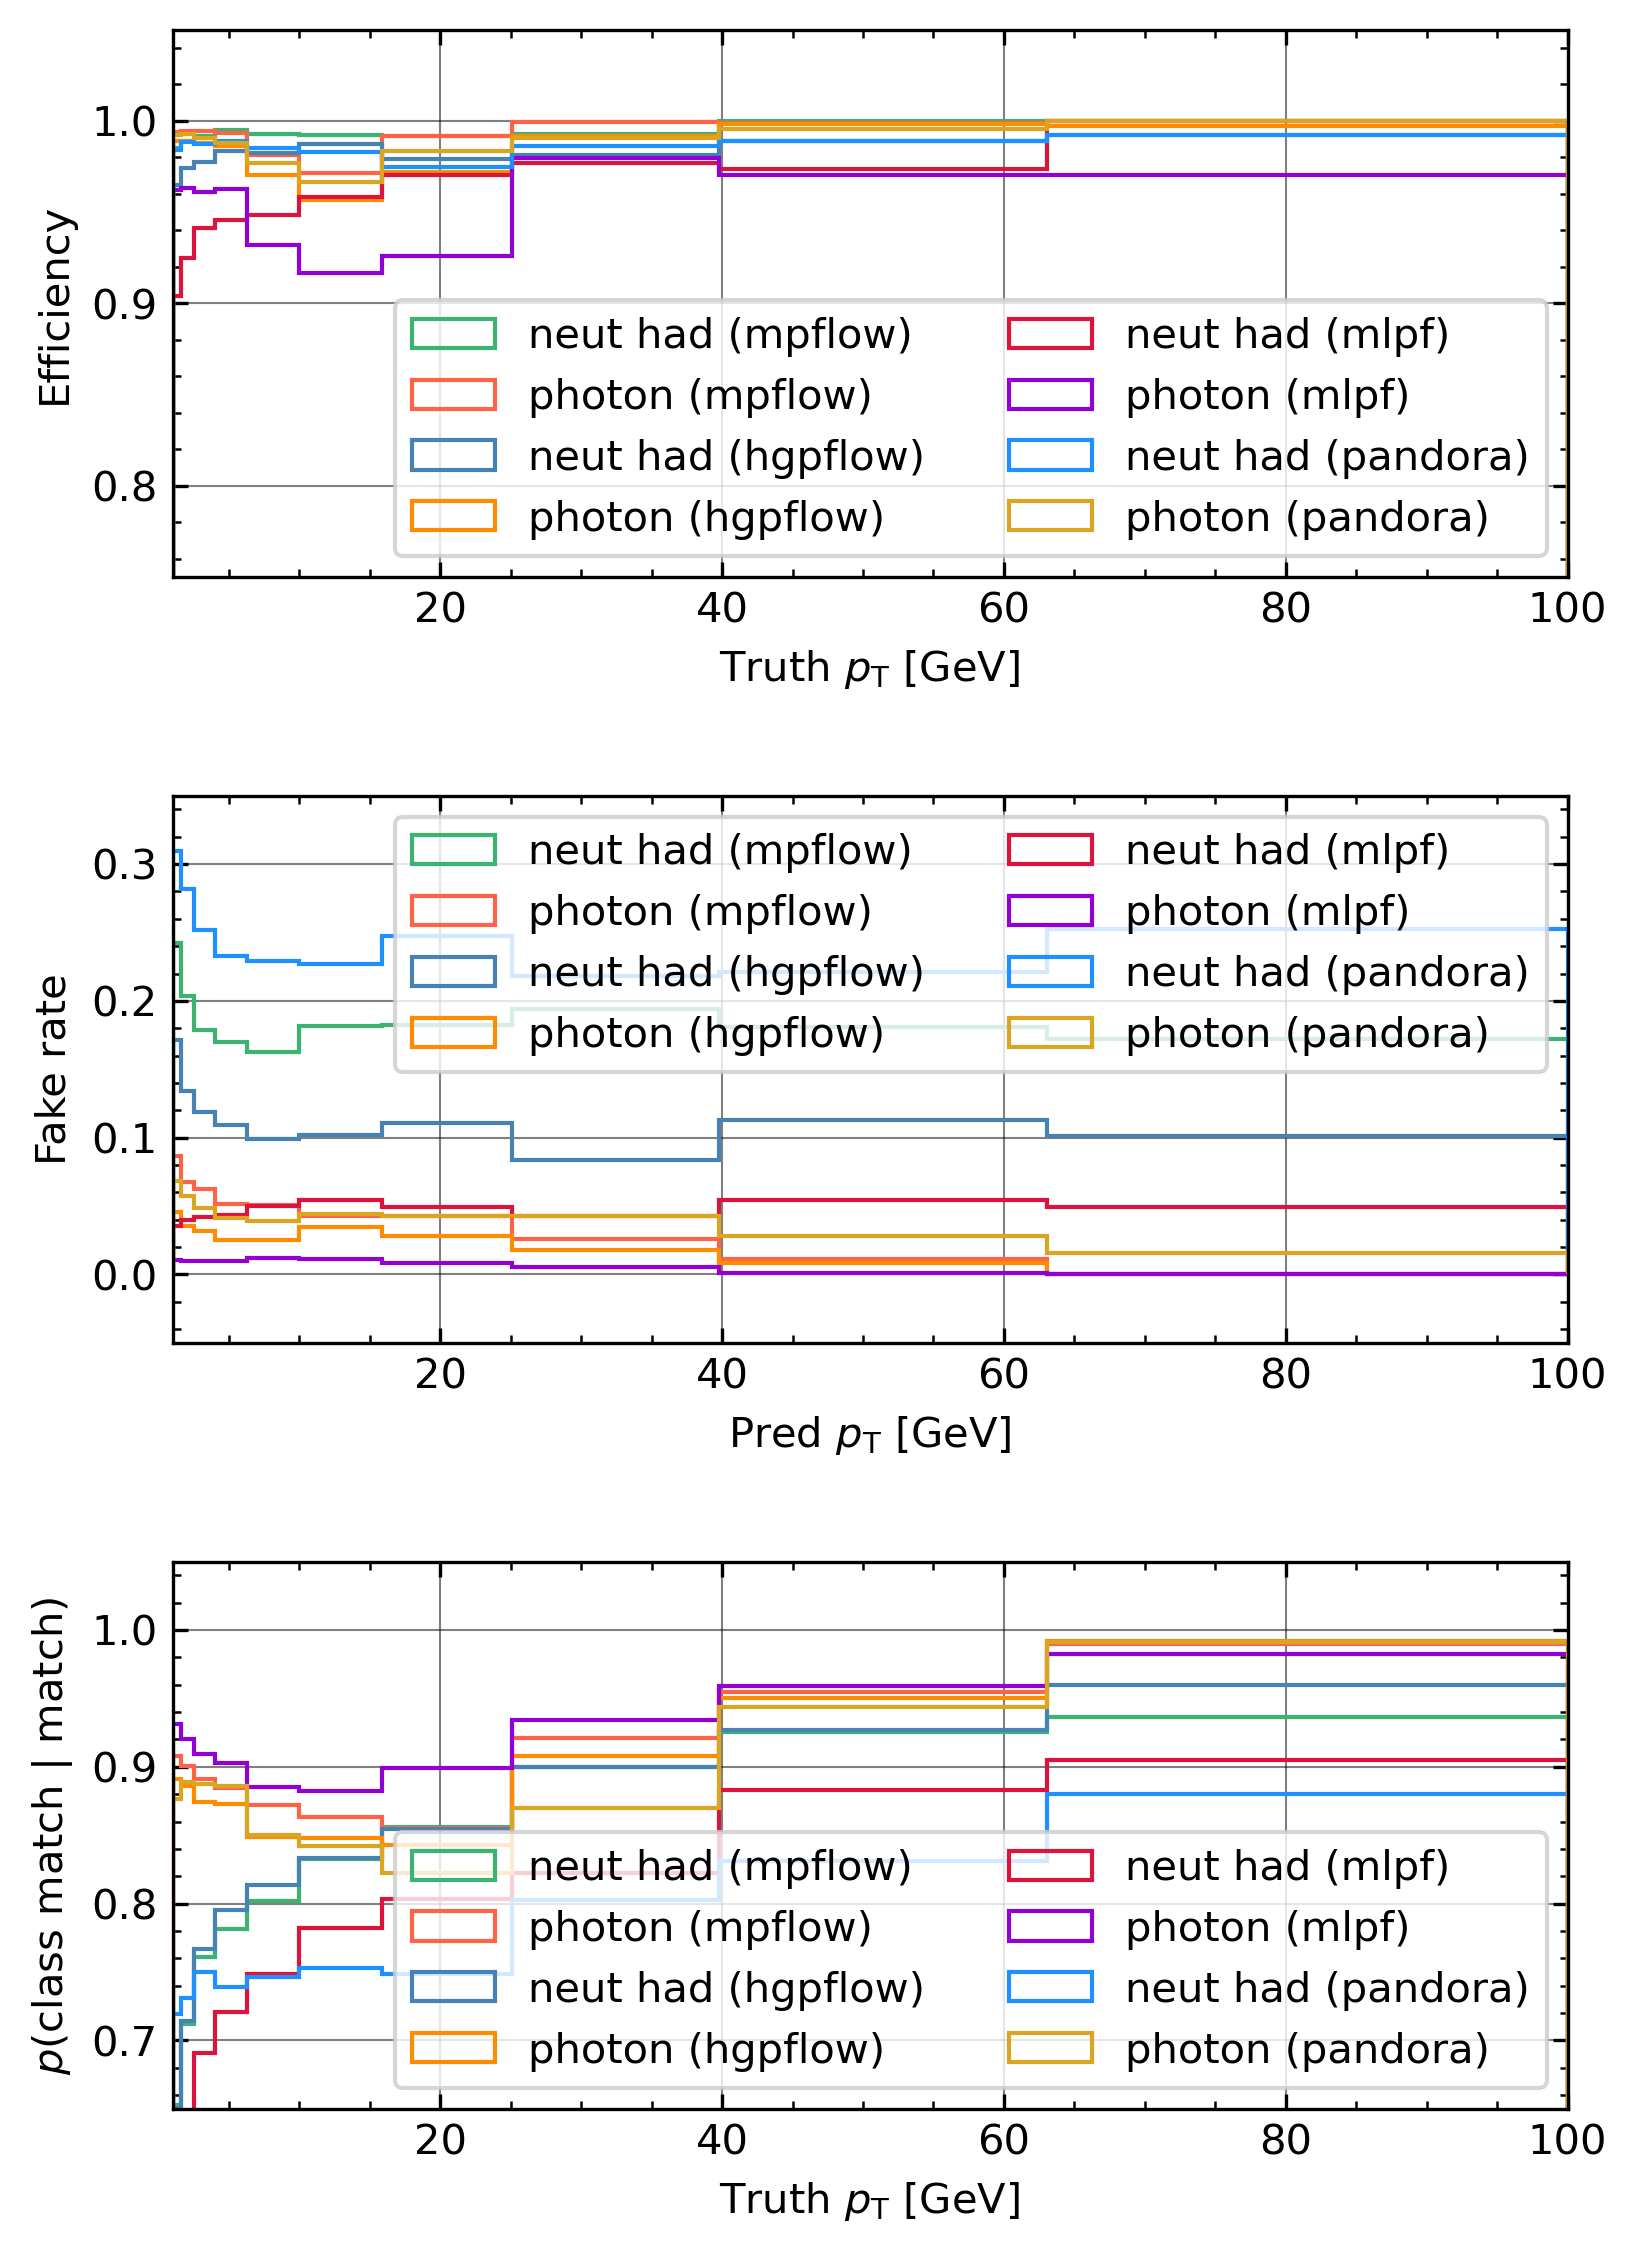

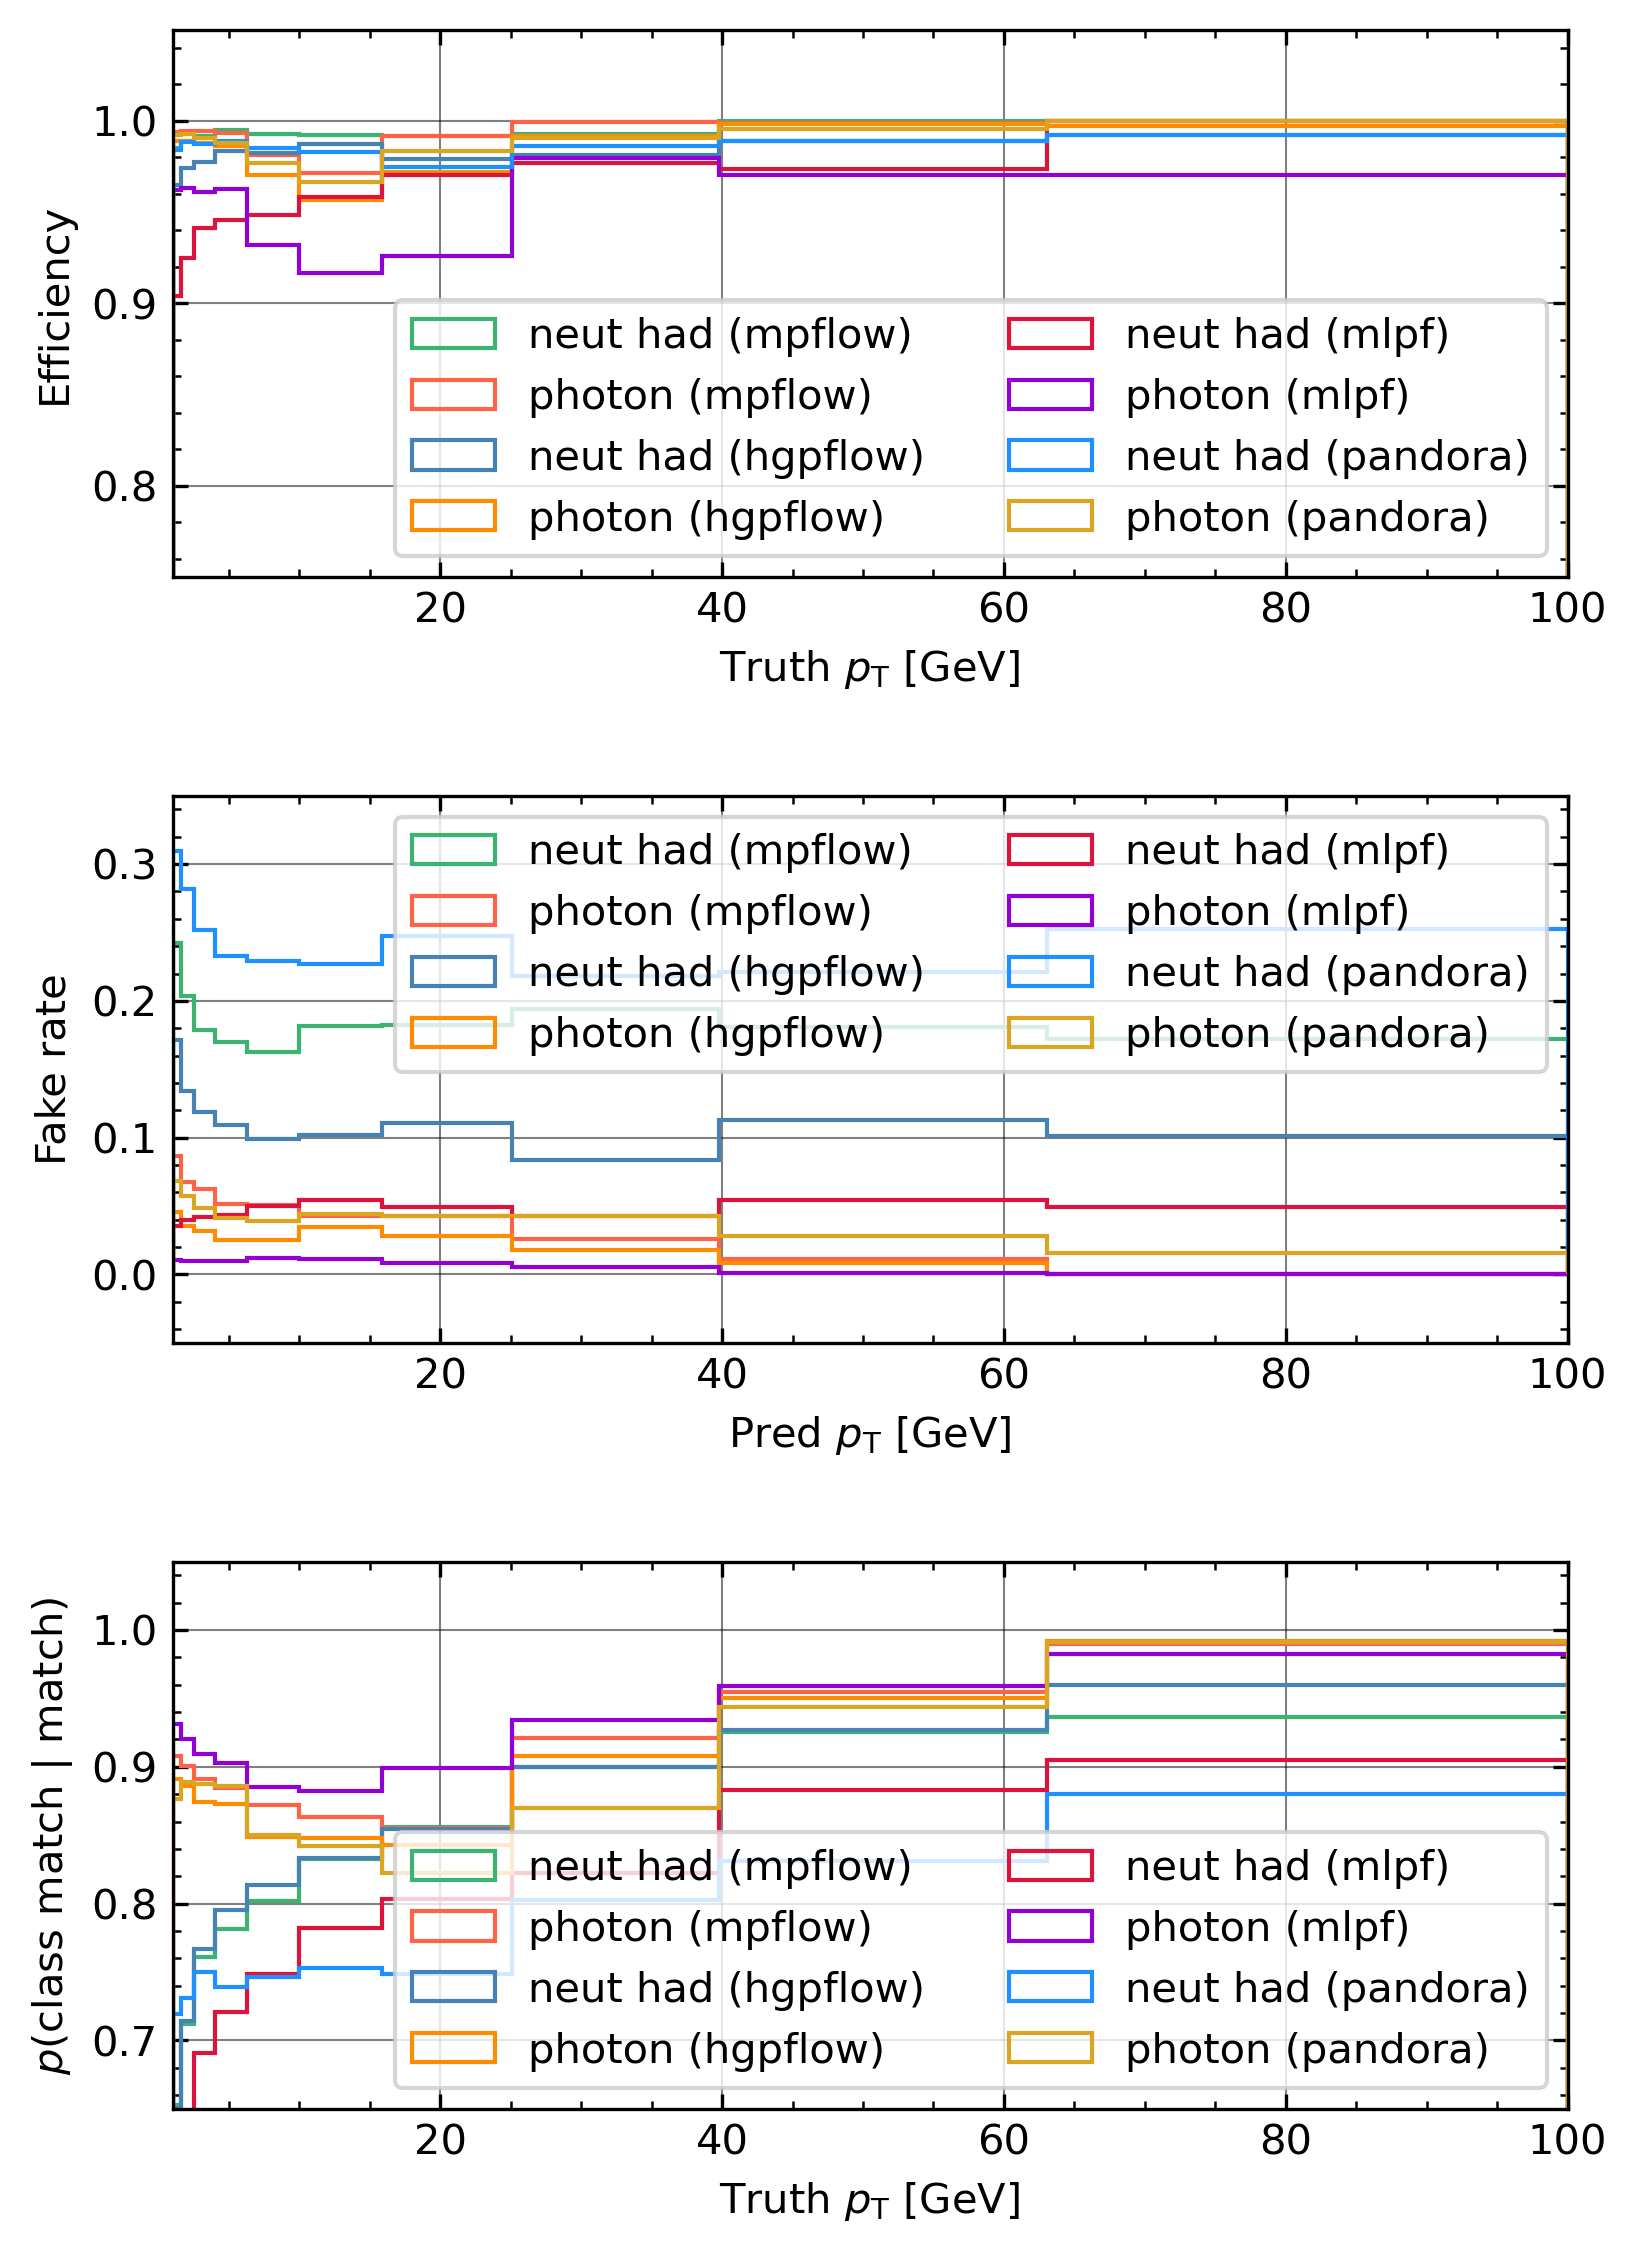

In [28]:
plot_helper.plot_eff_fr_purity(eff_fr_colors)